In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from surprise import SVD, Reader, Dataset 
from surprise.model_selection import cross_validate

### 데이터 불러오기

In [27]:
#아마존 데이터 불러오기
column_names=['productId','userId','rating','timestamp']
df=pd.read_csv('AMAZON_FASHION.csv',names=column_names)
df=df[['userId','productId','rating','timestamp']]

#아마존 메타 데이터 불러오기
import json

data = []
with open('meta_AMAZON_FASHION.json', 'r') as f:
    for line in f:
        # 각 줄을 JSON 객체로 변환
        json_line = json.loads(line)
        
        # 필요한 키만 선택하여 저장
        # data.append({key: json_line.get(key, None) for key in ['asin', 'title', 'also_buy', 'also_view', 'imageURLHighRes', 'categories']})
        data.append(json_line)

# 리스트를 DataFrame으로 변환
df_meta = pd.DataFrame(data)

In [28]:
df.head()

,userId,productId,rating,timestamp
0,A1D4G1SNUZWQOT,7106116521,5.0,1413763200
1,A3DDWDH9PX2YX2,7106116521,2.0,1411862400
2,A2MWC41EW7XL15,7106116521,4.0,1408924800
3,A2UH2QQ275NV45,7106116521,2.0,1408838400
4,A89F3LQADZBS5,7106116521,3.0,1406419200


In [29]:
df.shape

(883636, 4)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883636 entries, 0 to 883635
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     883636 non-null  object 
 1   productId  883636 non-null  object 
 2   rating     883636 non-null  float64
 3   timestamp  883636 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 27.0+ MB


In [31]:
df.isnull().sum()

userId       0
productId    0
rating       0
timestamp    0
dtype: int64

In [32]:
print(f"총 유저 유니크 수 : {len(df['userId'].value_counts())}")
print(f"총 상품 유니크 수 : {len(df['productId'].value_counts())}")

총 유저 유니크 수 : 749233
총 상품 유니크 수 : 186189


In [33]:
df_meta.isna().sum()/ len(df_meta) * 100

title               0.002679
brand              25.011118
feature            33.627844
rank                3.437153
date                0.876568
asin                0.000000
imageURL           29.265365
imageURLHighRes    29.265365
description        91.497399
price              90.463306
also_view          93.787405
also_buy           88.404229
fit                97.411553
details            99.525817
similar_item       99.830152
tech1              99.948027
dtype: float64

In [34]:
df_all = df.merge(df_meta.rename(columns={'asin':'productId'}), how  ='left', on='productId')

In [35]:
df_all

,userId,productId,rating,timestamp,title,brand,feature,rank,date,imageURL,imageURLHighRes,description,price,also_view,also_buy,fit,details,similar_item,tech1
0,A1D4G1SNUZWQOT,7106116521,5.0,1413763200,Milliongadgets(TM) Earring Safety Backs For Fi...,NaN,NaN,"2,081,098inClothing,ShoesJewelry(",fishhook,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A3DDWDH9PX2YX2,7106116521,2.0,1411862400,Milliongadgets(TM) Earring Safety Backs For Fi...,NaN,NaN,"2,081,098inClothing,ShoesJewelry(",fishhook,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2MWC41EW7XL15,7106116521,4.0,1408924800,Milliongadgets(TM) Earring Safety Backs For Fi...,NaN,NaN,"2,081,098inClothing,ShoesJewelry(",fishhook,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A2UH2QQ275NV45,7106116521,2.0,1408838400,Milliongadgets(TM) Earring Safety Backs For Fi...,NaN,NaN,"2,081,098inClothing,ShoesJewelry(",fishhook,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A89F3LQADZBS5,7106116521,3.0,1406419200,Milliongadgets(TM) Earring Safety Backs For Fi...,NaN,NaN,"2,081,098inClothing,ShoesJewelry(",fishhook,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884801,A1ZSB2Q144UTEY,B01HJHTH5U,5.0,1487635200,Edith Windsor Women's Deep V-neck Beaded Sequi...,Edith Windsor,[Product Dimensions:\n \n9....,"1,964,585inClothing,ShoesJewelry(",5 star,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,[B077ZLGMJ3],NaN,NaN,NaN,NaN
884802,A2CCDV0J5VB6F2,B01HJHTH5U,5.0,1480032000,Edith Windsor Women's Deep V-neck Beaded Sequi...,Edith Windsor,[Product Dimensions:\n \n9....,"1,964,585inClothing,ShoesJewelry(",5 star,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,[B077ZLGMJ3],NaN,NaN,NaN,NaN
884803,A3O90PACS7B61K,B01HJHTH5U,3.0,1478736000,Edith Windsor Women's Deep V-neck Beaded Sequi...,Edith Windsor,[Product Dimensions:\n \n9....,"1,964,585inClothing,ShoesJewelry(",5 star,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,[B077ZLGMJ3],NaN,NaN,NaN,NaN
884804,A2HO94I89U3LNH,B01HJHF97K,3.0,1478736000,Microcosm Retro Vintage Black Crochet Lace One...,Microcosm,[Package Dimensions:\n \n7....,"11,390,771inClothing,ShoesJewelry(",5 star5 star (0%),[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### EDA

C:\Users\ansck\AppData\Local\Temp\ipykernel_12780\3893822576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='winter')


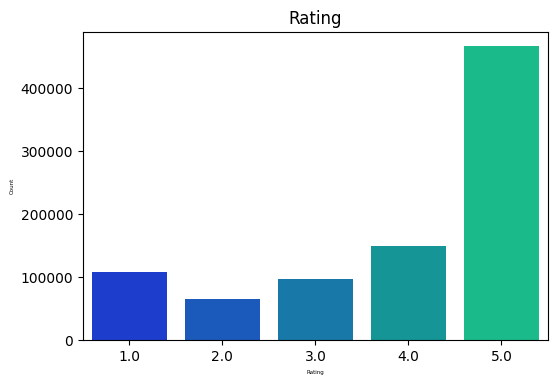

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df, palette='winter')
plt.xlabel('Rating', fontsize=4)
plt.ylabel('Count', fontsize=4)
plt.title('Rating', fontsize=12)
plt.show()

In [37]:
df_rating=pd.DataFrame({'Num_Rating':df.groupby('productId')['rating'].count(), 'Mean Rating':df.groupby('productId')['rating'].mean()})

In [38]:
df_rating.head()

,Num_Rating,Mean Rating
productId,,
0764443682,1,5.000000
1291691480,1,5.000000
1940280001,1,5.000000
1940735033,7,4.857143
1940967805,1,5.000000


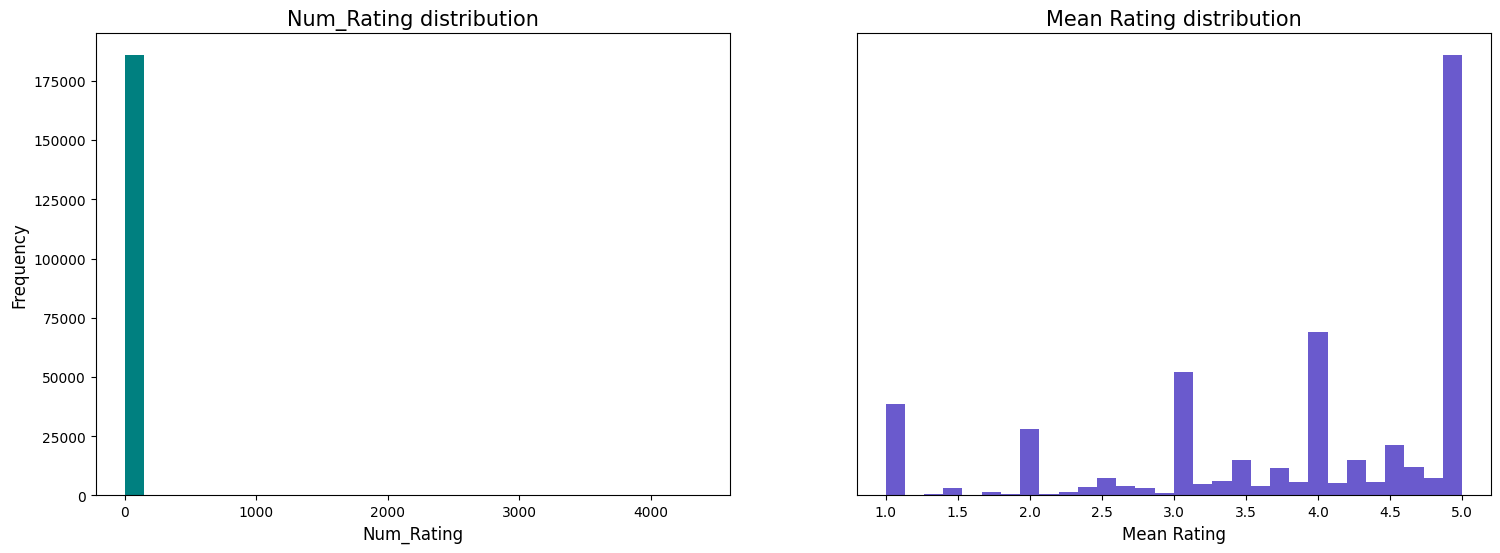

In [39]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.hist(x='Num_Rating',data=df_rating,bins=30,color='teal')
plt.title('Num_Rating distribution', fontsize=15)
plt.xlabel('Num_Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1,2,2)
plt.hist(x='Mean Rating',data=df_rating,bins=30, color='slateblue')
plt.title('Mean Rating distribution', fontsize=15)
plt.xlabel('Mean Rating', fontsize=12)
plt.yticks([])
plt.show()

<Figure size 800x600 with 0 Axes>

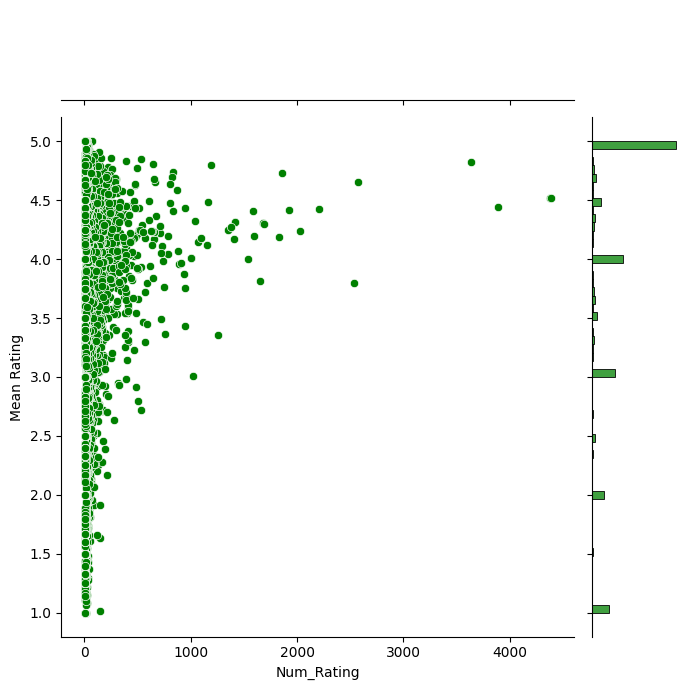

In [40]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Num_Rating', y='Mean Rating',data=df_rating,color='g', height=7)
plt.show()

### Data Preprocessing

In [59]:
userId_counts = df_all['userId'].value_counts()
valid_users = userId_counts[userId_counts >= 5].index
len(valid_users)

3725

In [60]:
df_validusers = df_all[df_all['userId'].isin(valid_users)]

In [62]:
df_validusers['userId'].value_counts().max()

40

In [64]:
len(df_validusers)

24139